In [146]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

In [147]:
import torch 
import torch.nn as nn

In [148]:
df = pd.read_csv("C:/Users/JAI KALYAN/Desktop/MRF.csv")
closed_prices = df["Adj Close"]

In [149]:
seq_len = 18

In [150]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [151]:
x = []
y =[]

In [152]:
for i in range(len(scaled_price)-seq_len):
    x.append(scaled_price[i:i+seq_len])
    y.append(scaled_price[i+seq_len])

In [153]:
x = np.array(x)[... , None]
y = np.array(y)[... , None]

In [154]:
train_x = torch.from_numpy(x[:int(0.8* x.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8* x.shape[0])]).float()
test_x = torch.from_numpy(x[int(0.8* x.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8* x.shape[0]):]).float()

In [155]:
class Model(nn.Module):
     def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
     def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])

In [156]:
model = Model(1, 120)

In [157]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [158]:
loss_fn = nn.MSELoss()

In [159]:
num_epochs = 100

In [160]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 ==0 and epoch != 1:
     print(epoch, "epoch loss" , loss.detach().numpy())

0 epoch loss 0.13489239
10 epoch loss 0.024540946
20 epoch loss 0.022296784
30 epoch loss 0.019746456
40 epoch loss 0.015037694
50 epoch loss 0.006244069
60 epoch loss 0.0038088178
70 epoch loss 0.0023686753
80 epoch loss 0.0021220392
90 epoch loss 0.001872505


In [161]:
model.eval()
with torch.no_grad():
    output = model(test_x)

In [162]:
pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())    

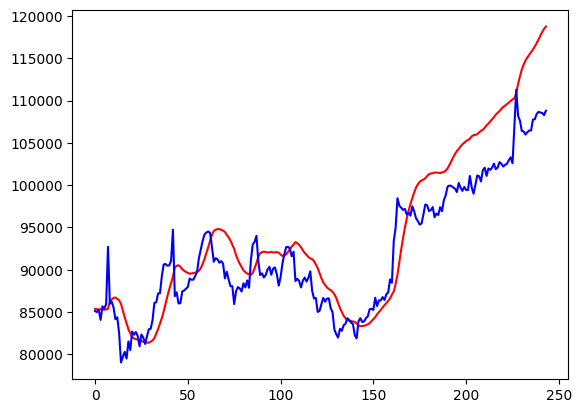

In [163]:
plt.plot(pred.squeeze() , color = "red", label = "predicted")
plt.plot(real.squeeze() , color = "blue", label = "real")
plt.show()